In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout
import matplotlib.pyplot as plt
import tensorflow as tf

In [19]:
#Načítanie datasetu
df = pd.read_excel("/content/drive/MyDrive/dataset.xlsx")

X = df.iloc[:, :25].values
y = df['Rozsev 0-5'].values

#Normalizácia dát pomocou MinMax
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

#Rozdelenie dát
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

In [45]:
 #Formátovanie vstupu
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

#Definovanie CNN modelu
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='SGD', loss='mean_absolute_error')

#Trénovanie
history = model.fit(X_train, y_train, epochs=80, batch_size=100, validation_data=(X_val, y_val))

#Vyhodnotenie modelu
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)


Epoch 1/80
3/3 [==============================] - 1s 102ms/step - loss: 10.2152 - val_loss: 9.6669
Epoch 2/80
3/3 [==============================] - 0s 21ms/step - loss: 10.1384 - val_loss: 9.6073
Epoch 3/80
3/3 [==============================] - 0s 22ms/step - loss: 10.0688 - val_loss: 9.5484
Epoch 4/80
3/3 [==============================] - 0s 21ms/step - loss: 10.0091 - val_loss: 9.4857
Epoch 5/80
3/3 [==============================] - 0s 24ms/step - loss: 9.9486 - val_loss: 9.4198
Epoch 6/80
3/3 [==============================] - 0s 22ms/step - loss: 9.8869 - val_loss: 9.3479
Epoch 7/80
3/3 [==============================] - 0s 31ms/step - loss: 9.8151 - val_loss: 9.2705
Epoch 8/80
3/3 [==============================] - 0s 23ms/step - loss: 9.7453 - val_loss: 9.1895
Epoch 9/80
3/3 [==============================] - 0s 48ms/step - loss: 9.6612 - val_loss: 9.1030
Epoch 10/80
3/3 [==============================] - 0s 38ms/step - loss: 9.5789 - val_loss: 9.0101
Epoch 11/80
3/3 [=======

Test Loss: 2.6461708545684814


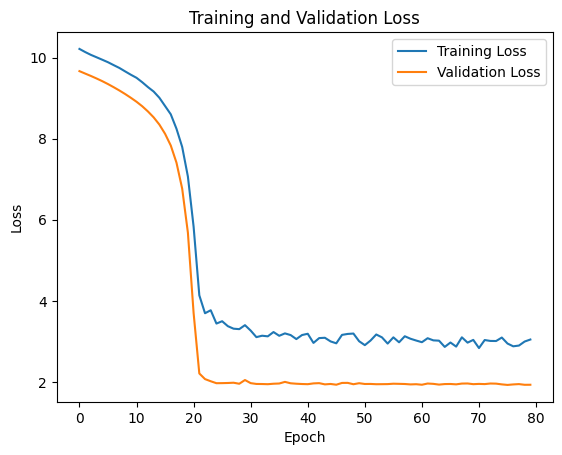

In [46]:
print("Test Loss:", loss)

#Zobrazenie v grafe
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()